# Part 1 - Data Preprocessing

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
dataset = pd.read_csv("Credit_Card_Applications.csv")

### Checking first 5 records of the training set
* CustomerID : ID of bank's Cutomers
* A1 to A14 : these are some sort of encoding values
* Class : **0** indicates customer **is not** evaluated as in fraudlent activity and **1** indicates customer **is** evaluated as in fraudlent activity

In [3]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [5]:
dataset.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


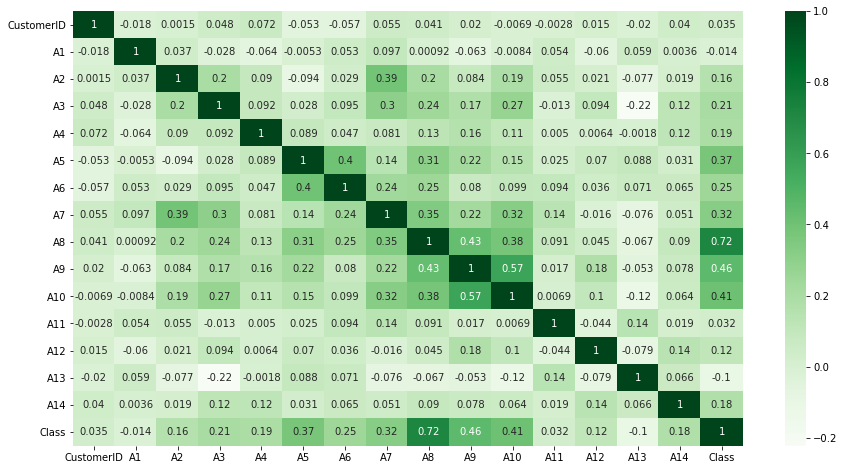

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
corr = dataset.corr()
sns.heatmap(corr, cmap="Greens", annot=True)

In [7]:
dataset.shape

(690, 16)

In [8]:
data_col = dataset.columns

In [9]:
data_col

Index(['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14', 'Class'],
      dtype='object')

### Let's divide into independent(X) and target variable(y)

In [10]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [11]:
X[0:3]

array([[1.5776156e+07, 1.0000000e+00, 2.2080000e+01, 1.1460000e+01,
        2.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.5850000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+02, 1.2130000e+03],
       [1.5739548e+07, 0.0000000e+00, 2.2670000e+01, 7.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.6500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 1.6000000e+02, 1.0000000e+00],
       [1.5662854e+07, 0.0000000e+00, 2.9580000e+01, 1.7500000e+00,
        1.0000000e+00, 4.0000000e+00, 4.0000000e+00, 1.2500000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 1.0000000e+00]])

In [12]:
y[0:3]

array([0, 0, 0], dtype=int64)

### Let's check data is balanced or not, and it seems balanced

In [13]:
dataset['Class'].value_counts()

0    383
1    307
Name: Class, dtype: int64

## Feature Scaling
*  there are mainly two ways to feature scaling
   1. Standardization  
   2. Normalization 
* in our case we gonna use normalization and specifically minmax scaler and the idea behind that is to convert all the values in the range of 0 to 1.
* we only normalize X not y.

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

In [15]:
X[0:3]

array([[0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
        0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.05      , 0.01212   ],
       [0.69609056, 0.        , 0.13413534, 0.25      , 0.5       ,
        0.53846154, 0.375     , 0.00578947, 0.        , 0.        ,
        0.        , 0.        , 0.5       , 0.08      , 0.        ],
       [0.38898166, 0.        , 0.23804511, 0.0625    , 0.        ,
        0.23076923, 0.375     , 0.04385965, 0.        , 0.        ,
        0.        , 1.        , 0.5       , 0.14      , 0.        ]])

In [16]:
y[0:3]

array([0, 0, 0], dtype=int64)

#### NOTE: We have 2 option to implement som(self organizing map) 1.create from the scratch 2.use class which is developed by another developer and we choosed 2 option which is pre defined class and this file som.py is in our directory.

# Step 2 - Training the SOM

In [17]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5,random_seed=8)

#initialize the weight randomely
som.random_weights_init(X)

som.train_random(data=X, num_iteration=100)

## Visualizing the results

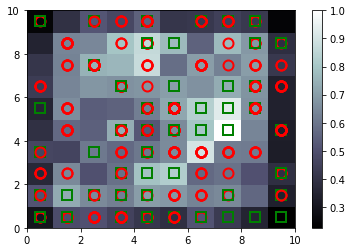

In [18]:
from pylab import bone, pcolor, colorbar, plot, show

#initialize blank window for the figure
bone()  

#this will return all the mean interneuron distances in one matrix
pcolor(som.distance_map().T)  

#adding legend
colorbar()

markers = ['o','s']
#r=didn't get approvel and g=got approvel
colors = ['r','g']

#running loop through all the customers, i=index, x=each customer
for i,x in enumerate(X):
    #getting winning node for specific customer
    w = som.winner(x)
    #place marker on it (add 0.5 for place the markers on center of winning node)
    #using y we gonna decide whather marker going to be red or green
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],  #defining colors
         markerfacecolor = 'None',      #no color inside of the marker
         markersize = 10,       #size of marker
         markeredgewidth = 2)      #edges size

## Let's find the Frauds

In [19]:
mappings = som.win_map(data=X)

In [20]:
frauds = np.concatenate((mappings[(6,3)], mappings[(4,7)], mappings[(4,8)]), axis=0)

In [21]:
#these frauds are potentially cheater so let's transform values as it was before
frauds = sc.inverse_transform(frauds)

In [22]:
fraud_customers = pd.DataFrame(frauds)

In [23]:
fraud_customers.columns=['CustomerID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14']

## below listed are potential frauds or higher chances to be,and these customers are not identified by bank. this data will help bank to take a closer look on these customer.

In [24]:
fraud_customers = fraud_customers.astype(int)

In [25]:
fraud_customers.shape

(25, 15)

### Let's make one variable for keeping record of these potentially frauds and add it into main dataset so that we can apply supervised deep learning.

In [26]:
# creating the matrix of features
cutomers = dataset.iloc[:, :].values

In [27]:
# creating the dependent variable, looping through whole dataset
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [28]:
customers = pd.DataFrame(cutomers)

In [29]:
is_fraud = pd.DataFrame(is_fraud)

In [30]:
bank_customers = pd.concat([customers, is_fraud], axis=1)

In [31]:
bank_customers

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0
0,15776156.0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0,0.0
1,15739548.0,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0,0.0
2,15662854.0,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0,1.0
3,15687688.0,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0,0.0
4,15715750.0,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223.0,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
686,15769980.0,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0,0.0,0.0
687,15675450.0,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0,1.0,0.0
688,15776494.0,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0,1.0,0.0


In [32]:
bank_customers.columns=['CustomerID','A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'A13', 'A14','Class1','Class']

In [33]:
bank_customers = bank_customers.astype(int)

In [34]:
bank_customers.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class1,Class
0,15776156,1,22,11,2,4,4,1,0,0,0,1,2,100,1213,0,0
1,15739548,0,22,7,2,8,4,0,0,0,0,0,2,160,1,0,0
2,15662854,0,29,1,1,4,4,1,0,0,0,1,2,280,1,0,1
3,15687688,0,21,11,1,5,3,0,1,1,11,1,2,0,1,1,0
4,15715750,1,20,8,2,6,4,1,1,1,14,0,2,60,159,1,0


In [35]:
bank_customers.to_csv('bank_customers.csv', index=False)